In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
user_df = pd.read_csv('./data/user_profile.csv')

In [3]:
user_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [4]:
user_df.shape

(33901, 15)

In [6]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [5]:
feature_names = list(user_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [8]:
scaler = StandardScaler()
user_df[feature_names] = scaler.fit_transform(user_df[feature_names])

In [9]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.064064e+06,-3.353495e-17,-5.700942e-17,-3.521170e-17,-7.671120e-17,3.353495e-18,3.688845e-17,-1.509073e-17,-1.676748e-17,6.706990e-17,-6.874665e-17,4.233788e-17,1.383317e-17,5.051202e-17,-5.281755e-17
std,4.972578e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,6.813480e+05,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,1.043907e+06,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,1.451159e+06,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.103039e+06,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


In [107]:
user = user_df.iloc[-1,1:]

In [10]:
features = user_df.loc[:,user_df.columns!='user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


In [12]:
user_ids = user_df.loc[:,user_df.columns=='user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


In [14]:
s = []
for k in range(1,30):
    km = KMeans(n_init='auto',n_clusters=k)
    km.fit_predict(features)
    s.append(km.inertia_)


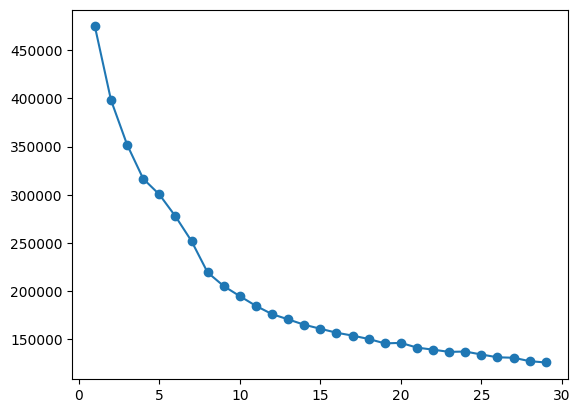

In [17]:
plt.plot(list(range(1,30)),s)
plt.scatter(list(range(1,30)),s)

In [18]:
cluster_labels = [None] * len(user_ids)

In [109]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(features)
cluster_labels = model.labels_
model.labels_

array([3, 7, 3, ..., 9, 0, 0])

In [21]:
def combine_cluster_labels(user_ids,labels):
    labels_df = pd.DataFrame(labels)
    cluster_df = pd.merge(user_ids,labels_df,left_index=True,right_index=True)
    cluster_df.columns = ['user','cluster']
    return cluster_df

In [22]:
cluster_df = combine_cluster_labels(user_ids,cluster_labels)
cluster_df

,user,cluster
0,2,2
1,4,2
2,5,10
3,7,3
4,8,3
...,...,...
33896,2102054,17
33897,2102356,3
33898,2102680,11
33899,2102983,3


In [23]:
features = user_df.loc[:, user_df.columns != 'user']
user_ids = user_df.loc[:, user_df.columns == 'user']
feature_names = list(user_df.columns[1:])

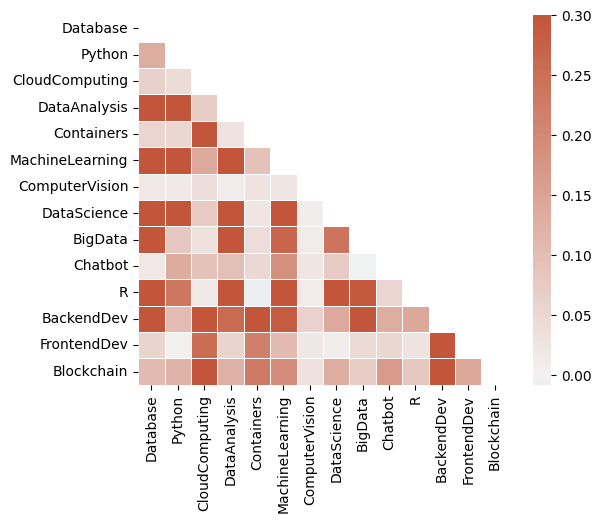

In [26]:
corr = features.cov()
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,square=True,center=0,linewidths=.5)
plt.show()

In [27]:
r = []
for n in range(1,15):
    pca = PCA(n_components=n)
    pca.fit(features)
    r.append(pca.explained_variance_ratio_.sum())
r

[0.2875684338769955,
 0.4630925644713251,
 0.5761339643675678,
 0.6487465627832335,
 0.719487876299717,
 0.7882103410314087,
 0.8429558465572807,
 0.8944445500368847,
 0.9272695591307636,
 0.9544658170614642,
 0.973357210316481,
 0.9870310843021108,
 0.9979163166617694,
 0.9999999999999999]

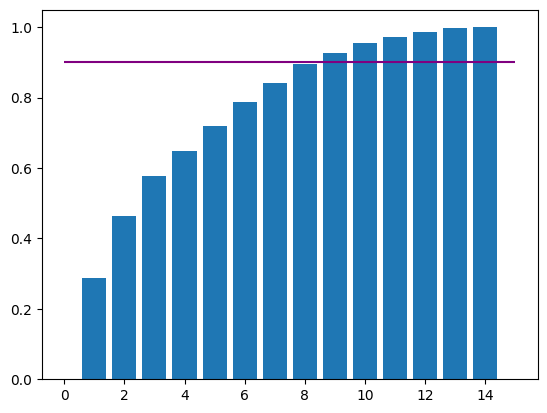

In [34]:
plt.bar(x=list(range(1,15)),height=r)
plt.hlines(y=0.9,xmax=15.0,xmin=0.0,colors='purple')
plt.show()

In [38]:
pca = PCA(n_components=9)
features_red = pca.fit_transform(features)
merged_pca_df = user_ids.join(pd.DataFrame(features_red)).reset_index()
merged_pca_df.rename(columns={0:'PC0',1:'PC1',2:'PC2',3:'PC3',4:'PC4',5:'PC5',6:'PC6',7:'PC7',8:'PC8'},inplace=True)
merged_pca_df

,index,user,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0,2,17.772494,0.200681,1.730609,2.567359,-3.825814,2.707154,0.681042,2.312613,0.868272
1,1,4,7.145199,-2.847481,2.358636,-0.576654,0.398803,-0.134533,0.549769,0.469033,0.033405
2,2,5,11.363270,1.873619,-1.522077,1.076144,-1.711688,0.883212,1.677582,2.937669,2.097639
3,3,7,-1.834033,-0.277462,0.564905,0.053470,-0.064440,0.165757,0.030956,0.039519,0.210887
4,4,8,-1.049125,-0.684767,1.072765,0.006371,-0.005695,0.118686,0.118559,0.559292,0.186379
...,...,...,...,...,...,...,...,...,...,...,...
33896,33896,2102054,0.633824,0.108815,-0.388871,-0.122665,-0.098364,0.358333,1.752049,1.486542,-0.523600
33897,33897,2102356,-2.095339,0.135058,0.244727,-0.088185,0.025081,0.183641,0.046413,0.191709,0.260437
33898,33898,2102680,0.625943,-0.547167,-1.692824,-0.630589,0.166632,0.676244,-0.055100,0.582091,1.703193
33899,33899,2102983,-2.036832,-0.153534,0.162852,0.082651,-0.126419,0.255109,0.072496,0.113750,0.622900


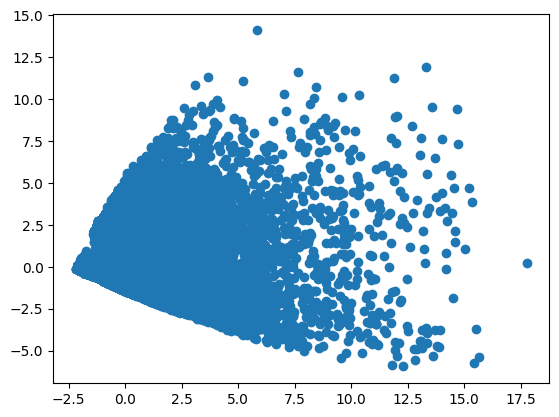

In [97]:
plt.scatter(features_red[:,0],features_red[:,1])

In [39]:
merged_pca_df.reset_index(drop=True,inplace=True)

In [41]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(merged_pca_df)

array([9, 9, 9, ..., 5, 5, 5])

In [46]:
clustered_users = user_ids.join(pd.DataFrame(km.labels_))

In [119]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_user_url)
test_users_df

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0
...,...,...,...
9397,1385217,EE0101EN,3.0
9398,1864644,DA0101EN,3.0
9399,435858,TMP0105EN,3.0
9400,1888188,DB0101EN,3.0


In [123]:
test_users_df = test_users_df[['user','item']]
labelled = pd.merge(test_users_df,cluster_df,left_on='user',right_on='user')
labelled.rename(columns={0:'cluster'},inplace=True)
labelled

,user,item,cluster
0,1502801,RP0105EN,13
1,1502801,BD0131EN,13
2,1502801,BD0212EN,13
3,1502801,BD0115EN,13
4,1502801,BD0211EN,13
...,...,...,...
9397,630511,BD0121EN,9
9398,630511,SC0101EN,9
9399,630511,BD0111EN,9
9400,630511,BD0115EN,9


In [125]:
courses_clusters = labelled[['item','cluster']]
courses_clusters['count'] = [1] * len(courses_clusters)
courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()
courses_clusters

,cluster,item,enrollments
0,0,BC0101EN,21
1,0,BC0201EN,2
2,0,BD0101EN,28
3,0,BD0111EN,16
4,0,BD0115EN,1
...,...,...,...
1183,19,SW0201EN,1
1184,19,TA0105,6
1185,19,TA0105EN,3
1186,19,TA0106EN,2


In [134]:
courses_clusters[courses_clusters['item']=='BC0201EN']

,cluster,item,enrollments
1,0,BC0201EN,2
56,1,BC0201EN,1
179,3,BC0201EN,19
279,4,BC0201EN,2
336,5,BC0201EN,35
392,6,BC0201EN,3
441,7,BC0201EN,1
572,10,BC0201EN,3
816,14,BC0201EN,5
891,15,BC0201EN,5
